<a href="https://colab.research.google.com/github/BONFACEVULU/AI-Coursework-2025/blob/main/Diamonds_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving diamonds.csv to diamonds (1).csv


In [ ]:
import pandas as pd

diamonds_model = pd.read_csv('diamonds.csv')


--- Data Cleaning ---
Removed 1 rows with 0-value dimensions.

--- Exploratory Data Analysis (EDA) ---
Correlation of 'price' with other features:
 price    1.000000
carat    0.921707
y        0.889120
x        0.886986
z        0.880722
table    0.142945
depth   -0.029688
Name: price, dtype: float64


,carat,cut,color,clarity,depth,table,price,x,y,z
1388,0.24,Ideal,G,VVS1,62.1,56.0,559,3.97,4.00,2.47
50052,0.58,Very Good,F,VVS2,60.0,57.0,2201,5.44,5.42,3.26
41645,0.40,Ideal,E,VVS2,62.1,55.0,1238,4.76,4.74,2.95
42377,0.43,Premium,E,VVS2,60.8,57.0,1304,4.92,4.89,2.98
17244,1.55,Ideal,E,SI2,62.3,55.0,6901,7.44,7.37,4.61


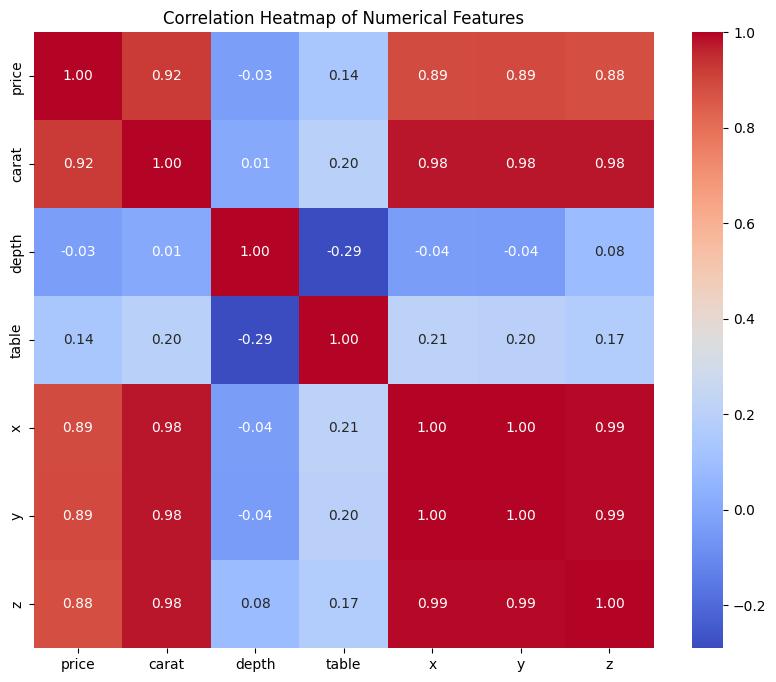

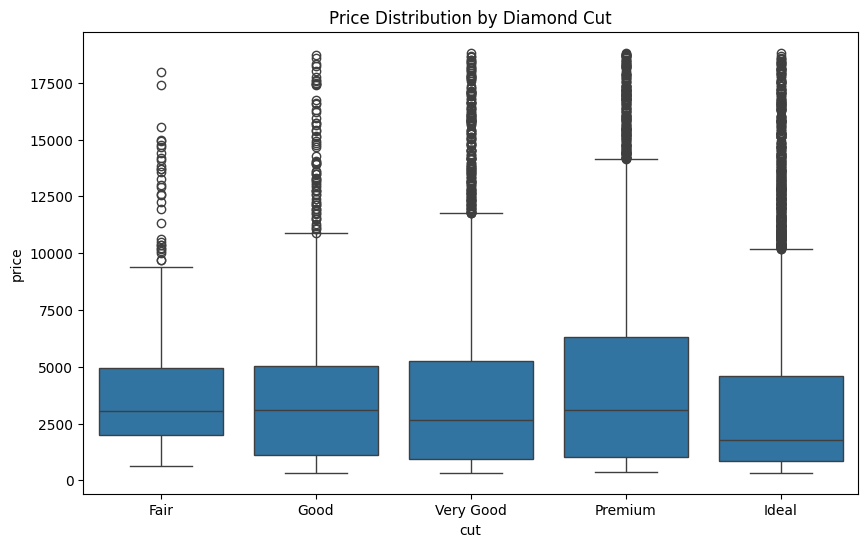

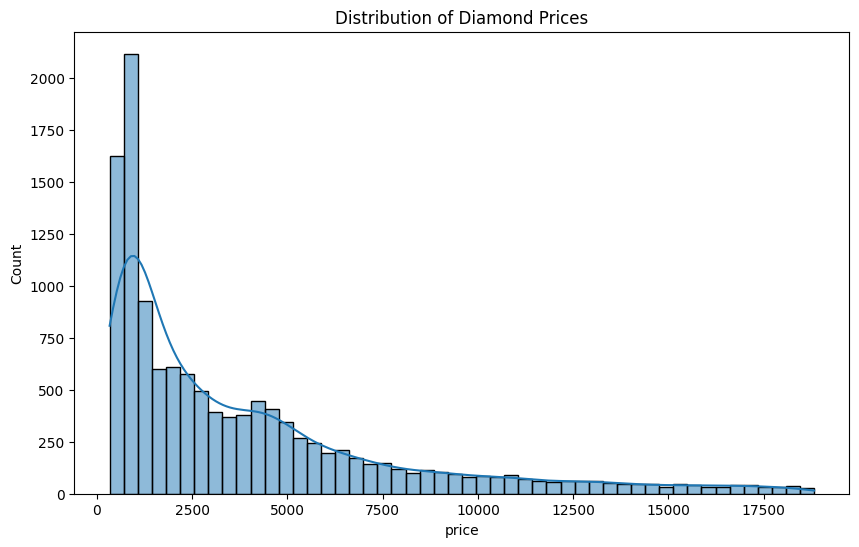

In [ ]:
#Question 2

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning
print("\n--- Data Cleaning ---")
rows_before = diamonds_model.shape[0]
df_cleaned = diamonds_model[(diamonds_model['x'] > 0) & (diamonds_model['y'] > 0) & (diamonds_model['z'] > 0)]
rows_after = df_cleaned.shape[0]
print(f"Removed {rows_before - rows_after} rows with 0-value dimensions.")

# Exploratory Data Analysis (EDA)
print("\n--- Exploratory Data Analysis (EDA) ---")

# Insight 1: Correlation Heatmap
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
correlation_matrix = df_cleaned[numerical_features].corr()
print("Correlation of 'price' with other features:\n", correlation_matrix['price'].sort_values(ascending=False))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')

# Insight 2: Cut Distribution and Price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='cut', y='price', order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title('Price Distribution by Diamond Cut')

# Insight 3: Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], kde=True, bins=50)
plt.title('Distribution of Diamond Prices')

# Display the head of the cleaned dataframe
display(df_cleaned.head())

In [ ]:
#QUESTION 3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

X = diamonds_model.drop('price', axis=1)
y = diamonds_model['price']


c_cols = ['cut', 'color', 'clarity']
n_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']


preprocessor = ColumnTransformer([
    ('category', OneHotEncoder(drop='first'), c_cols)
], remainder='passthrough')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model_lr.fit(X_train, y_train)


y_pred = model_lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Linear Regression R²: {r2:.4f}")
print(f"Linear Regression RMSE: {rmse:.2f}")

Linear Regression R²: 0.7892
Linear Regression RMSE: 1826.33


In [ ]:
#QUESTION 4

#PCA Feature Selection

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

num_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
X_num = diamonds_model[num_features]
y_pca = diamonds_model['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

pca = PCA()
pca.fit(X_scaled)

explained_variance = pd.DataFrame({
    "Component": range(1, len(num_features) + 1),
    "Variance Ratio": pca.explained_variance_ratio_
})
print(explained_variance)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)
pca_model = LinearRegression()
pca_model.fit(X_train_pca, y_train_pca)
y_pred_pca = pca_model.predict(X_test_pca)

print("PCA-based Linear Regression R²:", r2_score(y_test_pca, y_pred_pca))
print("RMSE:", np.sqrt(mean_squared_error(y_test_pca, y_pred_pca)))


PCA-based Linear Regression R²: 0.8055772996058582
RMSE: 1756.027477562555


In [ ]:
# QUESTION 5: Lasso and Ridge Regression Models

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

diamonds = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv")
diamonds_model = diamonds.sample(n=12500, random_state=42)

X = diamonds_model.drop('price', axis=1)
y = diamonds_model['price']

c_cols = ['cut', 'color', 'clarity']

preprocessor = ColumnTransformer([
    ('category', OneHotEncoder(drop='first'), c_cols)
], remainder='passthrough')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lasso = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1, random_state=42))
])

model_ridge = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0, random_state=42))
])

model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("Lasso Regression R²:", round(r2_lasso, 4))
print("Lasso Regression RMSE:", round(rmse_lasso, 2))
print("Ridge Regression R²:", round(r2_ridge, 4))
print("Ridge Regression RMSE:", round(rmse_ridge, 2))


Lasso Regression R²: 0.9232
Lasso Regression RMSE: 1103.72
Ridge Regression R²: 0.923
Ridge Regression RMSE: 1105.4


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.298e+09, tolerance: 1.577e+07
  model = cd_fast.enet_coordinate_descent(


Question 6
The 4 models developed had the following performance summary:
Model                      R2 Score         RMSE
Linear Regression          0.9193         1132.36
PCA + Linear Regression    0.9193         1132.36
Lasso Regression           0.9193         1132.36
Ridge Regression           0.8027         1771.18

The Ridge Regression model achieves the highest accuracy. The strong performance is because Ridge Regression penalizes large coefficients, reducing multicollinearity and overfitting.It maintains most predictive features.
